In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys # insert here the directory in which you have saved the file AppliedStatistics.py
sys.path.append(r"C:\Users\angelo\Documents\Python Scripts\AppliedStatisticsRoutines")
sys.path.append(r"W:\TH-Valleriani\AngeloSynchFold\Python Scripts\AppliedStatisticsRoutines")
import AppliedStatistics as appst
import importlib

*** Welcome to AppliedStatistics ***

Author: Angelo Valleriani
Affiliation: Max Planck Institute of Colloids and Interfaces
Contact: angelo.valleriani@mpikg.mpg.de
License: unlicensed (http://unlicense.org/)

Best use as: >>>import AppliedStatistics as appst

You are using AppliedStatistics version 2.1.2


#### References:

All exercise and data are taken from: 

Hogg, Tanis, Zimmerman, "Probability and Statistical Inference", Tenth Edition, Pearson

## Interval Estimation

### Estimation of one mean

Since we have a sample of N = 30 students, we cannot know exactly what is the mean BMI of the entire students population. We can use the sample to estimate this parameter. We base our estimation on the fact that the distribution of the BMI in both sexes is normally distributed. 

The point estimator of the mean is

$$ \overline{X}\, =\, \frac{1}{N}\sum_i X_i $$

and the point estimator of the variance is

$$ S^2 \, =\, \frac{1}{N-1}\sum_i \left(X_i-\bar{X}\right)^2 \, .$$

From the theory we know that if $X_i$ are independent normally distributed random variables with mean $\mu$ and variance $\sigma^2$, then the random variable $T$ defined as

$$ T_{[\nu]}\, =\, \frac{\overline{X}-\mu}{\sqrt{S^2/N}} $$

follows a t-distribution with $\nu = N-1$ degrees of freedom, which is a symmetric bell-shaped distribution centered in zero. The same distribution holds approximately when the sample size $N$ is large (e.g. $N>30$ in many cases) thanks to the central limit theorem. Consequently, it is possible to define a number $t_{\alpha/2}^{[\nu]}$ such that

$$\Pr\left\{ -t_{\alpha/2}^{[\nu]} \,\le\, T \,\le\, t_{\alpha/2}^{[\nu]}\right\}\, =\, 1-\alpha $$

or alternatively we define $t_{\alpha/2}^{[\nu]}$ from the integral

$$ \int_{-\infty}^{-t_{\alpha/2}^{[\nu]}} t_{[\nu]}(x)\, dx\, =\, \frac{\alpha}{2}\, . $$

Finally note that

$$\Pr\left\{ -t_{\alpha/2}^{[\nu]} \,\le\, T \,\le\, t_{\alpha/2}^{[\nu]}\right\}\, =\, 1-\alpha $$

is equal to

$$\int_{-\infty}^{t_{\alpha/2}} f(x)dx - \int_{-\infty}^{-t_{\alpha/2}} f(x)dx$$

#### Confidence interval for one mean

Based on the above theory, the $(1-\alpha)*100$% confidence interval is an interval estimate of the true mean. This interval estimate is obtained computing the point estimate $\overline{x}$ of the mean and the point estimate $s^2$ of the variance and given by

$$ \overline{x}\pm t_{\alpha/2}^{[\nu]}\sqrt{\frac{s^2}{N}} $$

#### Exercise 9

We take bags of candies that have the label of 52 grams. We want to make our own estimate of the weight of these bags. We go to different markets and buy a sample of 𝑁 = 10 bags. We assume that the variance is known, $𝜎^2=4$, and that the population is normally distributed.

In [2]:
#7.1-4
data = pd.read_csv("Exercise9.csv")
data.head()

x
0  55.95
1  56.54
2  57.58
3  55.13
4  57.48

In [3]:
print(list(data["x"]))

[55.95, 56.54, 57.58, 55.13, 57.48, 56.06, 59.93, 58.3, 52.57, 58.46]


In this exercise we assume that the variance $\sigma^2 = 4$ is known and that the population is normally distributed. In general, it is difficult to know the variance of a population. Nevertheless in some practical cases, a previous study might have generated such a lot of data that the estimated variance from those previous studies can be considered as good enough for the subsequent study. 

We look for the 95% interval estimate of the mean but we explore also other levels of confidence.

In [4]:
from scipy.stats import norm
alphas = [0.01,0.05,0.10] # various alphas to test different confidence level
z_a2 = list(-norm.ppf(np.array(alphas)/2)) # get the corresponding $z_{\alpha/2}$
for i,alpha in enumerate(alphas):
    print("For alpha = "+str(alpha)+" we have z_{alpha/2} = ", round(z_a2[i],3))

For alpha = 0.01 we have z_{alpha/2} =  2.576
For alpha = 0.05 we have z_{alpha/2} =  1.96
For alpha = 0.1 we have z_{alpha/2} =  1.645


In [5]:
x_bar = np.mean(data["x"])
N = len(data)
sigma2 = 4
sem = np.sqrt(sigma2/N)
print("The sample size is N =", N)
print("The sample mean is x_bar =", round(x_bar,3), "grams")
print("The standard error of the mean (sem) is:", round(sem,3), "grams")

The sample size is N = 10
The sample mean is x_bar = 56.8 grams
The standard error of the mean (sem) is: 0.632 grams


In [6]:
for i,alpha in enumerate(alphas):
    a = x_bar - z_a2[i]*sem
    b = x_bar + z_a2[i]*sem
    print()
    print("The "+str((1-alpha)*100)+"% confidence interval for the population mean is:", \
    [round(a,2), round(b,2)], "grams")


The 99.0% confidence interval for the population mean is: [55.17, 58.43] grams

The 95.0% confidence interval for the population mean is: [55.56, 58.04] grams

The 90.0% confidence interval for the population mean is: [55.76, 57.84] grams


In this exercise we have a sample size of N = 10, which is very small to apply the Central Limit Theorem. Since we have assumed that the population is normally distributed, there is no problem. But if the population cannot be assumed to be normal, we can check if the population is approximately normal with the probability plot. 

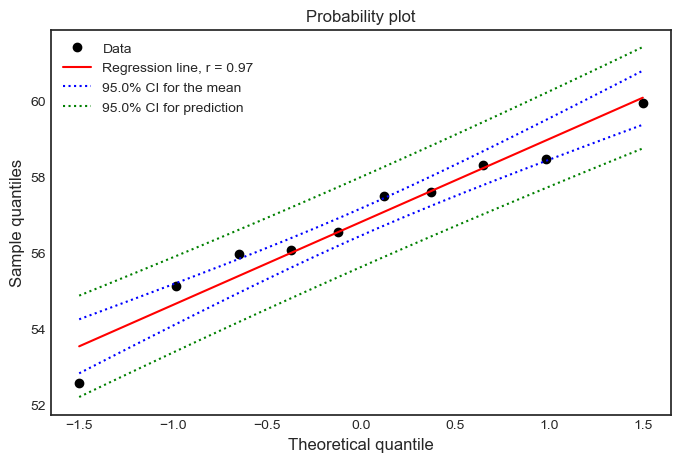

In [7]:
qq_plot = appst.probability_plot(X=data, verbose = False)

#### Exercise 10

The data in this exercise represents the number of bacterial colonies (times 100) in N = 30 samples of 100 ml water from a lake. We want to give an interval estimate of the mean number of bacterial colonies in such an amount of water.

In [8]:
from scipy.stats import t as t_dist

In [9]:
# 7.1.5
data = pd.read_csv("Exercise10.csv")
data.head()

Nb-Col
0      93
1     140
2       8
3     120
4       3

In [10]:
data.tail()

Nb-Col
25       9
26      73
27      49
28      37
29      92

In [11]:
histo = appst.density_histogram(X=data, nbins = 10, plotfig = True, discr = False, xlabel = 'Number of colonies')

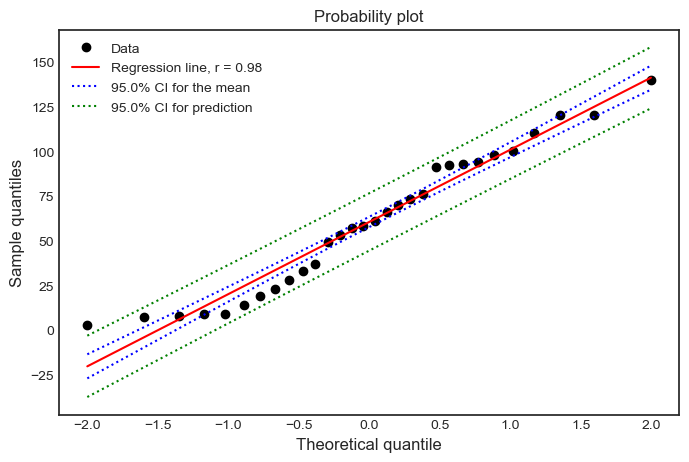

The sample size is N =  30
The point estimate of the mean is: 60.367 number of colonies
The point estimate of the standard deviation is: 39.622 number of colonies
The Standard Error of the Mean is: 7.234 number of colonies

The lower limit of the two-sided 90.0% CI for the mean is: 48.075 number of colonies
The upper limit of the two-sided 90.0% CI for the mean is: 72.658 number of colonies



In [12]:
results = appst.conf_int_mean_one_sample(X=data, alpha = 0.1, units = 'number of colonies')

In [13]:
results

{'size': 30,
 'mean': 60.36666666666667,
 'sigma': 39.621905586415835,
 'sem': 7.2339371536733035,
 'conf-int': (48.07528854061555, 72.65804479271779),
 'sigma2': 1569.8954022988503,
 'sigma2-ci': (1069.7887799721107, 2570.9298190831105)}

#### Exercise 11

Elementary particle detectors have been tested with beams of particles all having a controlled energy. The energy read by N = 15 different detectors on such beams are given. We want to see how precise the detectors are.

In [14]:
#7.1-12
data = pd.read_csv("Exercise11.csv")
data.head()

Energy
0     260
1     216
2     259
3     206
4     265

In [15]:
print(list(data["Energy"]))

[260, 216, 259, 206, 265, 284, 291, 229, 232, 250, 225, 242, 240, 252, 236]


In [16]:
results = appst.conf_int_mean_one_sample(X = data, alpha = 0.05)

The sample size is N =  15
The point estimate of the mean is: 245.8 units for x
The point estimate of the standard deviation is: 23.641 units for x
The Standard Error of the Mean is: 6.104 units for x

The lower limit of the two-sided 95.0% CI for the mean is: 232.708 units for x
The upper limit of the two-sided 95.0% CI for the mean is: 258.892 units for x



In [23]:
np.array(data["Energy"])

array([260, 216, 259, 206, 265, 284, 291, 229, 232, 250, 225, 242, 240,
       252, 236], dtype=int64)

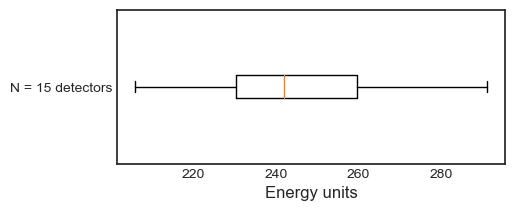

In [28]:
# boxplot = appst.boxplot(X=data, xlabel = 'Energy units',box_label="N=15 detectors")
plt.figure(figsize=(5,2))
plt.boxplot(data, vert=False, labels=["N = 15 detectors"])
plt.xlabel("Energy units", fontsize = 12)
plt.show()

#### Confidence interval for the difference of two means from independent populations

Finally, we would like to estimate the difference of the means of two independent samples. In the case dealt with here, with samples nearby normally distributed, we can proceed in the standard way. 

The theory here is a bit more complicated and the building of the confidence interval depends also on whether the two variances can be considered identical (pooled) or not (Welch).

The problem we want to solve is to get the confidence interval of the difference of the mean BMI of female students minus the mean BMI of male students.

Let $X_i$ and $Y_j$ be the elements of two independent samples of size $N_x$ and $N_y$ with population mean $\mu$ and $\nu$, respectively and identical variance $\sigma^2$. Then after the measurement, the $(1-\alpha)100$% confidence interval for $\mu-\nu$ is given by

$$
\overline{x}-\overline{y} \, \pm\, t_{\alpha/2}^{[\eta]} \sqrt{\frac{(N_x-1)s_x^2+(N_y-1)s_y^2}{N_x+N_y-2}}\sqrt{\frac{1}{N_x}+\frac{1}{N_y}}
$$
with the number of degrees of freedom $\eta=N_x+N_y-2$.

#### Exercise 12

Male and female spiders have different lengths. To estimate the difference of the mean length of the two genders, two independent samples of 𝑁 = 𝑀 = 30 spiders have been captured and their length measured in mm. We want an estimate of the difference of their legs length.

In [19]:
# 7.2-5
data = pd.read_csv("Exercise12.csv")
data.head()

male  female
0  5.20    8.25
1  4.70    9.95
2  5.75    5.90
3  7.50    7.05
4  6.45    8.45

In [20]:
X = np.array(data["male"]).reshape(-1,)
Y = np.array(data["female"]).reshape(-1,)

In [21]:
x = [X,Y]
plt.figure(figsize=(5,5))
plt.boxplot(x, vert=False, labels=("male","female"))
plt.xlabel("mm", fontsize = 12)
plt.show()

Measures of centralities at comparison

In [22]:
centr_male = appst.centralities(X=X)
centr_female = appst.centralities(X=Y)


Measures of centrality:
Mean: 5.917
Median: 5.85
Midrange: 6.1


Measures of centrality:
Mean: 8.153
Median: 8.175
Midrange: 8.35



In [23]:
columns = centr_male.keys()
index = ["male", "female"]
values = np.array(list(centr_male.values())+list(centr_female.values())).reshape(2,-1)
centrals_df = pd.DataFrame(values, columns = columns, index = index)

In [24]:
centrals_df.round(2)

mean  median  midrange
male    5.92    5.85      6.10
female  8.15    8.18      8.35

Measures of spread at comparison

In [25]:
sprd_male = appst.spreads(X=X)
sprd_female = appst.spreads(X=Y)


Measures of spread:
Standard deviation: 0.663
Interquartile Range: 0.737
Range: 2.8


Measures of spread:
Standard deviation: 1.187
Interquartile Range: 1.638
Range: 4.9



In [26]:
columns = sprd_male.keys()
index = ["male", "female"]
values = np.array(list(sprd_male.values())+list(sprd_female.values())).reshape(2,-1)
spreads_df = pd.DataFrame(values, columns = columns, index = index)

In [27]:
spreads_df

std     IQR  range
male    0.663238  0.7375    2.8
female  1.187429  1.6375    4.9

Are male legs length normally distributed?

In [29]:
qq_male = appst.probability_plot(X=X, title = "male spiders")

Are female legs length normally distributed?

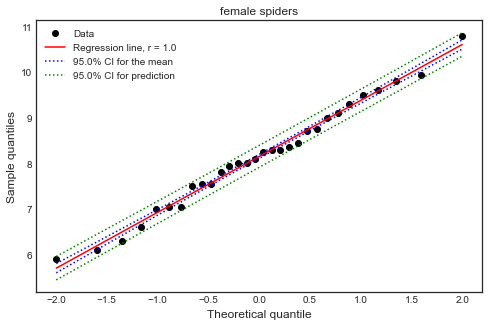

In [31]:
qq_female = appst.probability_plot(X=Y, title = "female spiders")

From these probability plots we conclude that the two samples are approximately normally distributed

In [32]:
results = appst.conf_int_means_two_indep_samples(X=X,Y=Y,alpha=0.05,units='mm',\
                                                 pooled=False, sides = 'two')

Welch's test with 45 degrees of freedom
The point estimate of the difference of the means (E[X]-E[Y]) is: -2.237 mm

The Standard Error of the difference of the means is: 0.248 mm
The 95% confidence interval for the ratio of the two variances is: (0.148, 0.655)

The lower limit of the two-sided 95.0% CI of the difference of the means is: -2.737 mm
The upper limit of the two-sided 95.0% CI of the difference of the means is: -1.737 mm


In [33]:
results

{'size-x': 30,
 'size-y': 30,
 'mean-x': 5.916666666666667,
 'mean-y': 8.153333333333334,
 'var-x': 0.4398850574712642,
 'var-y': 1.4099885057471266,
 'df': 45,
 'diff-ci': (-2.7368073174791014, -1.736526015854233),
 'vars-ratio-ci': (0.14849042474337357, 0.6554639715614112)}

Step-by-step calculations

In [34]:
alpha = 0.05
df = results["df"] # computed above using the Welch formula
t_a2 = -t_dist.ppf(alpha/2,df)
print(t_a2)

2.0141033848332928


In [35]:
sW = np.sqrt(results["var-x"]/30 + results["var-y"]/30) # the standard deviation associated to the difference of the means
print(sW) 

0.24831925440303595


In [36]:
ci_left = results["mean-x"]-results["mean-y"] - t_a2*sW
ci_right = results["mean-x"]-results["mean-y"] + t_a2*sW

In [37]:
print([ci_left, ci_right])

[-2.7368073174791014, -1.736526015854233]


## Conclusions

From this unit you have learned how to produce an interval estimate the mean of a sample when it comes from a normally distributed population or when it comes from a large sample, for which the central limit theorem applies. 

The typical procedure goes through the t-interval, for which an estimation of the population variance with the sample is needed.

While the situation is simple for one single sample, when two samples are compared it becomes crucial to verify if the variances of the two populations are possibly identical. If they are not identical, the computation of the number of degrees of freedom becomes less intuitive but this can be easily left to the software.